<a href="https://www.kaggle.com/code/anderaraujo/feat-engineering-eda-viz-a-social-look?scriptVersionId=156097816" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# A SOCIAL LOOK FOR SOCIAL MEDIA PREFERENCES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns

# Importing data

In [2]:
df = pd.read_csv('/kaggle/input/which-social-media-millennials-care-about-most/WhatsgoodlyData-10.csv')
df.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Instagram,2559,0.273
1,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Facebook,1182,0.126
2,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Snapchat,5423,0.579
3,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Linkedin,210,0.022
4,You open ur phone and have a notif badge on in...,Web,Web-based respondents,Instagram,30,0.256


# Feature Engineering
### Transforming Segment Description column in social questions

In [3]:
df.Question.unique()

array(['You open ur phone and have a notif badge on instagram, facebook, snapchat, and linkedin...which do you click first?'],
      dtype=object)

In [4]:
df['Segment Description'].unique()

array(['Mobile respondents', 'Web-based respondents',
       'Female respondents', 'Male respondents', 'John Glenn High School',
       'Alfred State University', 'Johns Hopkins University',
       'Chapman University', 'Hillsdale College',
       'University of New Hampshire', 'University of North Carolina',
       'Vanderbilt University', 'University of Virginia',
       'University of Texas', 'Cornell University', 'Butler University',
       'University of Illinois', 'University of Washington',
       'Cal Poly San Luis Obispo', 'Penn State University',
       'University of Michigan', 'Northwestern University',
       'Montgomery Blair High School', 'University of Alabama',
       'James Madison University', 'Texas Christian University',
       'Texas A&M University', 'University of Arkansas',
       'San Diego State University', 'University of Colorado Boulder',
       'Smith College', 'University of Notre Dame',
       'University of Nebraska Omaha', 'University of Delaware',
   

In [5]:
df[df['Segment Description'].str.contains(r'\?+')]

,Question,Segment Type,Segment Description,Answer,Count,Percentage
324,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Instagram,69,0.217
325,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Facebook,59,0.186
326,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Snapchat,177,0.557
327,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Linkedin,13,0.041
328,You open ur phone and have a notif badge on in...,Custom,student loan debt? No,Instagram,355,0.278
...,...,...,...,...,...,...
511,You open ur phone and have a notif badge on in...,Custom,your parents make? $50K-$90K,Linkedin,4,0.015
512,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other 🐧,Instagram,5,0.217
513,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other 🐧,Facebook,6,0.261
514,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other 🐧,Snapchat,11,0.478


In [6]:
df[df['Segment Description'].str.contains(r'\?+')]['Segment Description'].unique()

array(['your parents make? $90K-$240k', 'student loan debt? No',
       'student loan debt? Yes', "you vote for? Didn't vote",
       'your parents make?  < $50K', 'you vote for? Writing in Bernie',
       'you vote for? Hillary Clinton', 'closely identify as? White',
       'Mac or PC? Mac 🖥', "I'm in? Post-grad", 'Mac or PC? PC 💻',
       'your parents make? > $240K', 'is your age? 35 or older',
       'is your age? 31-34', "What's your leaning? In-between",
       "What's your leaning? Liberal 🔷",
       "What's your leaning? Conservative 🐘", 'is your age? 25-30',
       'is your age? 18-24', 'is your age? 15-17',
       'is your age? 14 or younger', "I'm in? College",
       'you vote for? Other', 'you vote for? Gary Johnson',
       'Are you? None/Other', 'Are you? Muslim', 'Are you? Jewish',
       'Sexual orientation? Bi', 'Sexual orientation? Straight',
       'Sexual orientation? Gay', "I'm in? Other", 'Are you? Christian',
       'you vote for? Jill Stein', 'closely identify 

In [7]:
df[~df['Segment Description'].str.contains(r'\?+')]['Segment Description'].unique()

array(['Mobile respondents', 'Web-based respondents',
       'Female respondents', 'Male respondents', 'John Glenn High School',
       'Alfred State University', 'Johns Hopkins University',
       'Chapman University', 'Hillsdale College',
       'University of New Hampshire', 'University of North Carolina',
       'Vanderbilt University', 'University of Virginia',
       'University of Texas', 'Cornell University', 'Butler University',
       'University of Illinois', 'University of Washington',
       'Cal Poly San Luis Obispo', 'Penn State University',
       'University of Michigan', 'Northwestern University',
       'Montgomery Blair High School', 'University of Alabama',
       'James Madison University', 'Texas Christian University',
       'Texas A&M University', 'University of Arkansas',
       'San Diego State University', 'University of Colorado Boulder',
       'Smith College', 'University of Notre Dame',
       'University of Nebraska Omaha', 'University of Delaware',
   

In [8]:
df_custom = df[df['Segment Description'].str.contains(r'\?+')]

In [9]:
df_QA = df_custom['Segment Description'].str.split(r'\?', expand = True).rename(columns = {0:'personal_question', 1:'personal_answer'})
df_QA.head()

,personal_question,personal_answer
324,your parents make,$90K-$240k
325,your parents make,$90K-$240k
326,your parents make,$90K-$240k
327,your parents make,$90K-$240k
328,student loan debt,No


In [10]:
df_custom_tr = df_custom.join(df_QA).copy()
df_custom_tr

,Question,Segment Type,Segment Description,Answer,Count,Percentage,personal_question,personal_answer
324,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Instagram,69,0.217,your parents make,$90K-$240k
325,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Facebook,59,0.186,your parents make,$90K-$240k
326,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Snapchat,177,0.557,your parents make,$90K-$240k
327,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Linkedin,13,0.041,your parents make,$90K-$240k
328,You open ur phone and have a notif badge on in...,Custom,student loan debt? No,Instagram,355,0.278,student loan debt,No
...,...,...,...,...,...,...,...,...
511,You open ur phone and have a notif badge on in...,Custom,your parents make? $50K-$90K,Linkedin,4,0.015,your parents make,$50K-$90K
512,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other 🐧,Instagram,5,0.217,Mac or PC,Other 🐧
513,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other 🐧,Facebook,6,0.261,Mac or PC,Other 🐧
514,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other 🐧,Snapchat,11,0.478,Mac or PC,Other 🐧


In [11]:
var_names = {
    'Segment Type':'question_segment',
    'Answer':'answer',
    'Count':'count',
    'Percentage':'percentage',
    'Segment Description':'segment_description'
}

df_custom_tr = df_custom_tr.rename(columns = var_names).copy()
df_custom_tr.head()

,Question,question_segment,segment_description,answer,count,percentage,personal_question,personal_answer
324,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Instagram,69,0.217,your parents make,$90K-$240k
325,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Facebook,59,0.186,your parents make,$90K-$240k
326,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Snapchat,177,0.557,your parents make,$90K-$240k
327,You open ur phone and have a notif badge on in...,Custom,your parents make? $90K-$240k,Linkedin,13,0.041,your parents make,$90K-$240k
328,You open ur phone and have a notif badge on in...,Custom,student loan debt? No,Instagram,355,0.278,student loan debt,No


In [12]:
df_custom_tr.drop(['Question','segment_description'], axis = 1, inplace = True)
df_custom_tr.head()

,question_segment,answer,count,percentage,personal_question,personal_answer
324,Custom,Instagram,69,0.217,your parents make,$90K-$240k
325,Custom,Facebook,59,0.186,your parents make,$90K-$240k
326,Custom,Snapchat,177,0.557,your parents make,$90K-$240k
327,Custom,Linkedin,13,0.041,your parents make,$90K-$240k
328,Custom,Instagram,355,0.278,student loan debt,No


In [13]:
df_custom_tr.personal_question.unique()

array(['your parents make', 'student loan debt', 'you vote for',
       'closely identify as', 'Mac or PC', "I'm in", 'is your age',
       "What's your leaning", 'Are you', 'Sexual orientation'],
      dtype=object)

In [14]:
p_question = {'your parents make':'parents_salary',
'student loan debt':'student_loan_debt',
'closely identify as':'ethnicity',
'you vote for':'vote',
'Mac or PC':'computer',
"I'm in":'studying',
'is your age':'age',
"What's your leaning":'leaning',
"Are you":'religion',
'Sexual orientation':'sexual_orientation'}

In [15]:
df_custom_tr['personal_question'] = df_custom_tr.personal_question.replace(p_question)
df_custom_tr.head()

,question_segment,answer,count,percentage,personal_question,personal_answer
324,Custom,Instagram,69,0.217,parents_salary,$90K-$240k
325,Custom,Facebook,59,0.186,parents_salary,$90K-$240k
326,Custom,Snapchat,177,0.557,parents_salary,$90K-$240k
327,Custom,Linkedin,13,0.041,parents_salary,$90K-$240k
328,Custom,Instagram,355,0.278,student_loan_debt,No


In [16]:
df_custom_tr['personal_answer'] = df_custom_tr.personal_answer.str.lower()

In [17]:
df_custom_tr['personal_answer'].unique()

array([' $90k-$240k', ' no', ' yes', " didn't vote", '  < $50k',
       ' writing in bernie', ' hillary clinton', ' white', ' mac 🖥',
       ' post-grad', ' pc 💻', ' > $240k', ' 35 or older', ' 31-34',
       ' in-between', ' liberal 🔷', ' conservative 🐘', ' 25-30', ' 18-24',
       ' 15-17', ' 14 or younger', ' college', ' other', ' gary johnson',
       ' none/other', ' muslim', ' jewish', ' bi', ' straight', ' gay',
       ' christian', ' jill stein', ' black', ' confused', ' grad school',
       ' donald trump', ' native american', ' asian', ' hispanic',
       ' high school', '  $50k-$90k', ' other 🐧'], dtype=object)

In [18]:
df_custom_tr['personal_answer'] = df_custom_tr.personal_answer.str.lstrip().str.rstrip()

In [19]:
df_custom_tr['personal_answer'].unique()

array(['$90k-$240k', 'no', 'yes', "didn't vote", '< $50k',
       'writing in bernie', 'hillary clinton', 'white', 'mac 🖥',
       'post-grad', 'pc 💻', '> $240k', '35 or older', '31-34',
       'in-between', 'liberal 🔷', 'conservative 🐘', '25-30', '18-24',
       '15-17', '14 or younger', 'college', 'other', 'gary johnson',
       'none/other', 'muslim', 'jewish', 'bi', 'straight', 'gay',
       'christian', 'jill stein', 'black', 'confused', 'grad school',
       'donald trump', 'native american', 'asian', 'hispanic',
       'high school', '$50k-$90k', 'other 🐧'], dtype=object)

In [20]:
p_answer = {
    'mac 🖥':'mac',
    'pc 💻':'pc',
    'liberal 🔷':'liberal',
    'conservative 🐘':'conservative',
    'other 🐧':'other'
}

In [21]:
df_custom_tr['personal_answer'].replace(p_answer, inplace= True)

In [22]:
df = df.rename(columns = var_names)\
        .drop('Question', axis = 1)\
        .copy()

In [23]:
df_tr = df.join(df_custom_tr[['personal_question','personal_answer']]).copy()
df_tr.head()

,question_segment,segment_description,answer,count,percentage,personal_question,personal_answer
0,Mobile,Mobile respondents,Instagram,2559,0.273,NaN,NaN
1,Mobile,Mobile respondents,Facebook,1182,0.126,NaN,NaN
2,Mobile,Mobile respondents,Snapchat,5423,0.579,NaN,NaN
3,Mobile,Mobile respondents,Linkedin,210,0.022,NaN,NaN
4,Web,Web-based respondents,Instagram,30,0.256,NaN,NaN


In [24]:
df_pivot = df_tr.pivot(values = 'personal_answer', columns = ['personal_question'])
df_pivot

personal_question,NaN,age,computer,ethnicity,leaning,parents_salary,religion,sexual_orientation,student_loan_debt,studying,vote
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
511,NaN,NaN,NaN,NaN,NaN,$50k-$90k,NaN,NaN,NaN,NaN,NaN
512,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_final = df_tr.join(df_pivot).drop(['personal_question','personal_answer',np.nan], axis = 1).copy()
df_final

,question_segment,segment_description,answer,count,percentage,age,computer,ethnicity,leaning,parents_salary,religion,sexual_orientation,student_loan_debt,studying,vote
0,Mobile,Mobile respondents,Instagram,2559,0.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mobile,Mobile respondents,Facebook,1182,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mobile,Mobile respondents,Snapchat,5423,0.579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mobile,Mobile respondents,Linkedin,210,0.022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Web,Web-based respondents,Instagram,30,0.256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,Custom,your parents make? $50K-$90K,Linkedin,4,0.015,NaN,NaN,NaN,NaN,$50k-$90k,NaN,NaN,NaN,NaN,NaN
512,Custom,Mac or PC? Other 🐧,Instagram,5,0.217,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,Custom,Mac or PC? Other 🐧,Facebook,6,0.261,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,Custom,Mac or PC? Other 🐧,Snapchat,11,0.478,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

### You open ur phone and have a notif badge<br>on instagram, facebook, snapchat, and linkedin.<br>which do you click first?

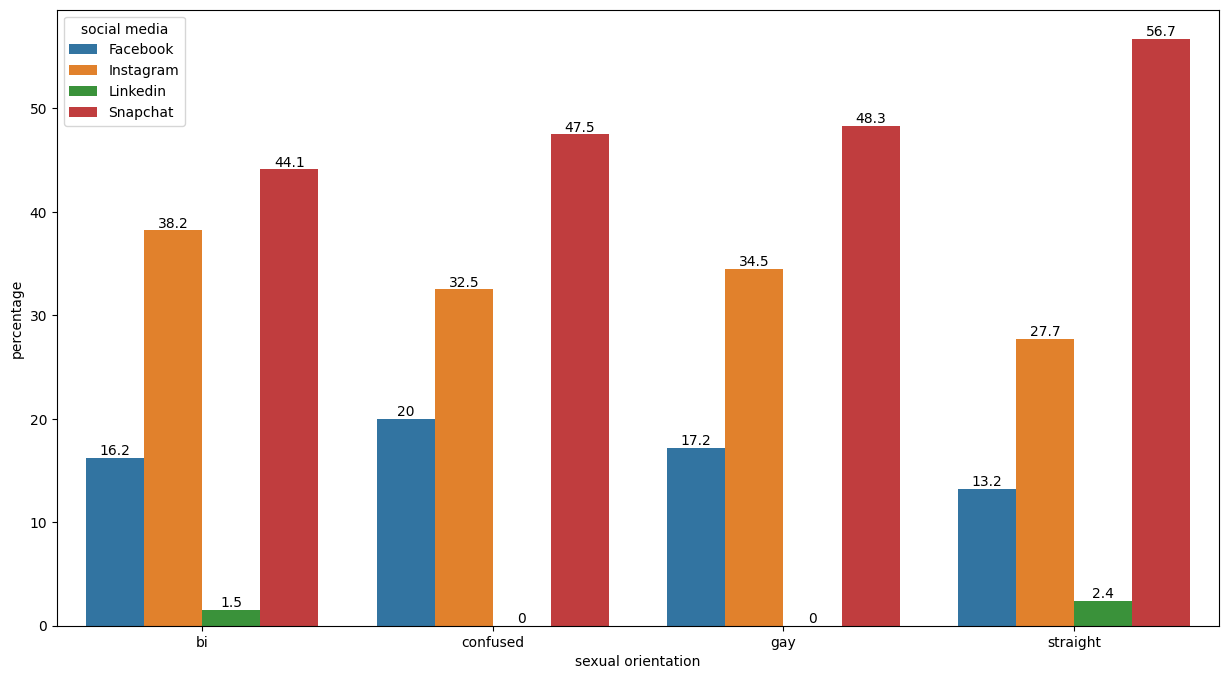

In [26]:
df_chart = df_final.groupby(['sexual_orientation','answer'])['percentage'].sum().reset_index()
df_chart['percentage'] = df_chart['percentage'].apply(lambda x: x*100)

plt.figure(figsize = (15,8))
ax = sns.barplot(data = df_chart, x = 'sexual_orientation', y = 'percentage', hue = 'answer')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
plt.legend(title = 'social media')
plt.xlabel('sexual orientation')
plt.show()

We cannot extract a lot of insights from results for sexual orientation

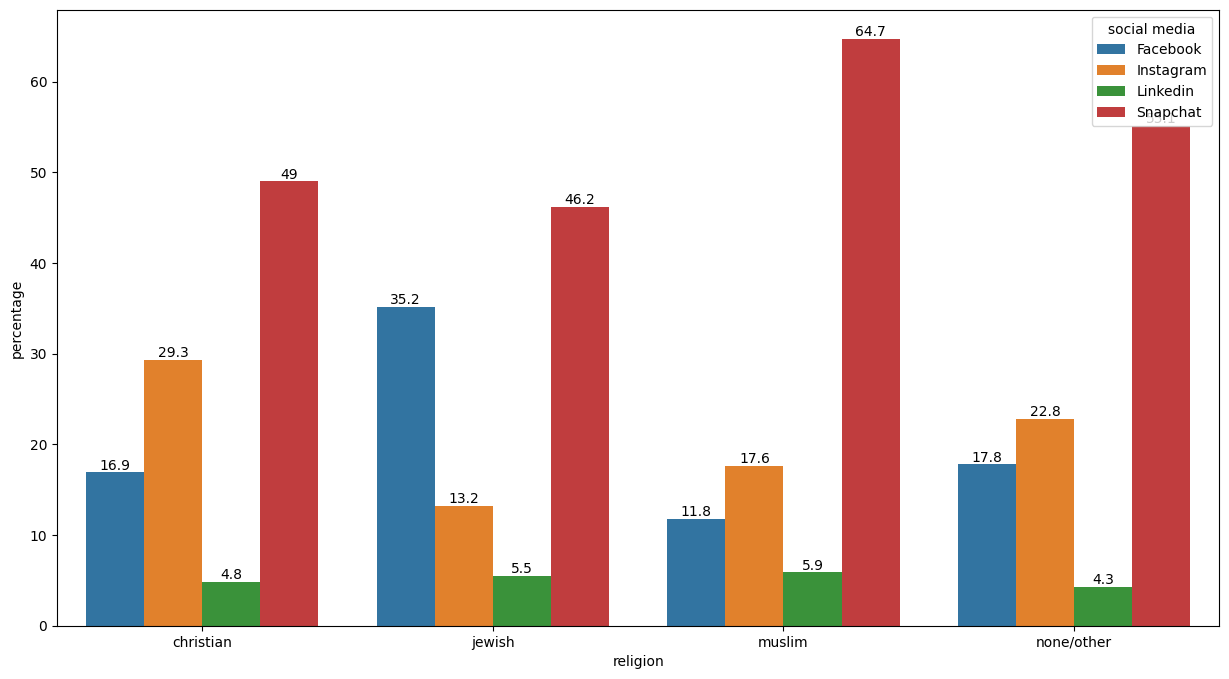

In [27]:
df_chart = df_final.groupby(['religion','answer'])[['percentage']].sum().reset_index()
df_chart['percentage'] = df_chart['percentage'].apply(lambda x: x*100)

plt.figure(figsize = (15,8))
ax = sns.barplot(data = df_chart, x = 'religion', y = 'percentage', hue = 'answer')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
plt.legend(title = 'social media')
plt.show()

We see that Jewish people tends to use more facebook than the other religions
Snapchat is the champion for all religions between milenials

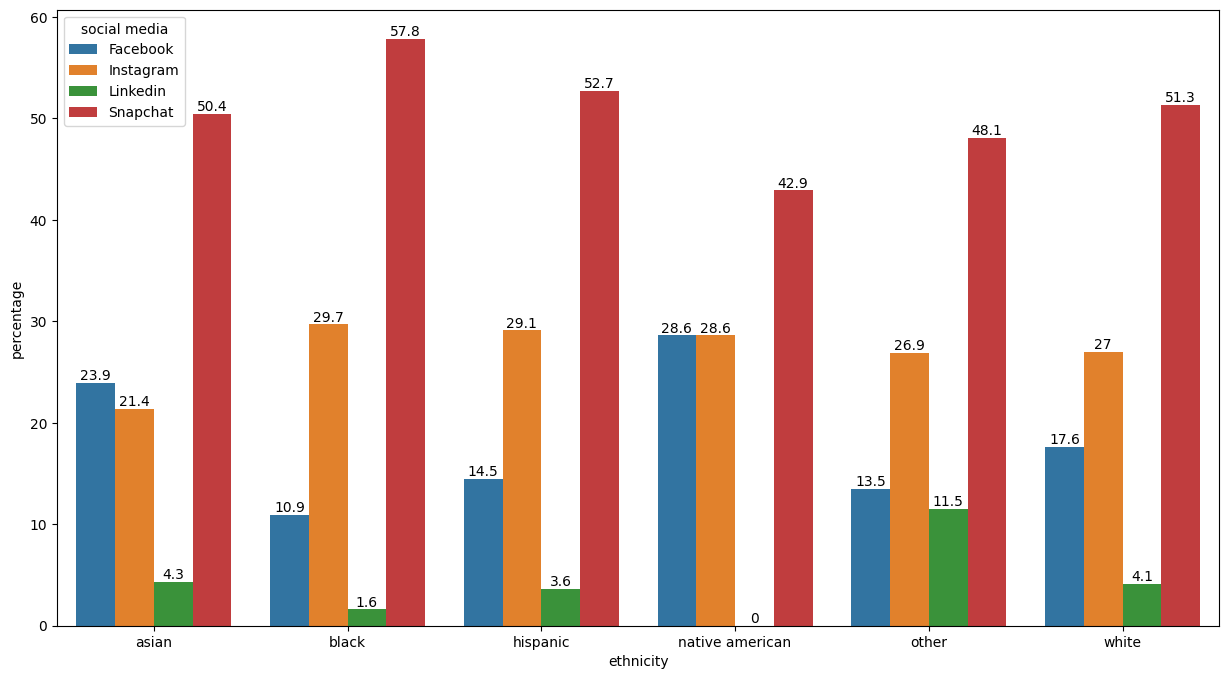

In [28]:
df_chart = df_final.groupby(['ethnicity','answer'])[['percentage']].sum().reset_index()
df_chart['percentage'] = df_chart['percentage'].apply(lambda x: x*100)

plt.figure(figsize = (15,8))
ax = sns.barplot(data = df_chart, x = 'ethnicity', y = 'percentage', hue = 'answer')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
plt.legend(title = 'social media')
plt.show()

Asians likes facebook more than instagram. It seems native american do not need to find a job =D

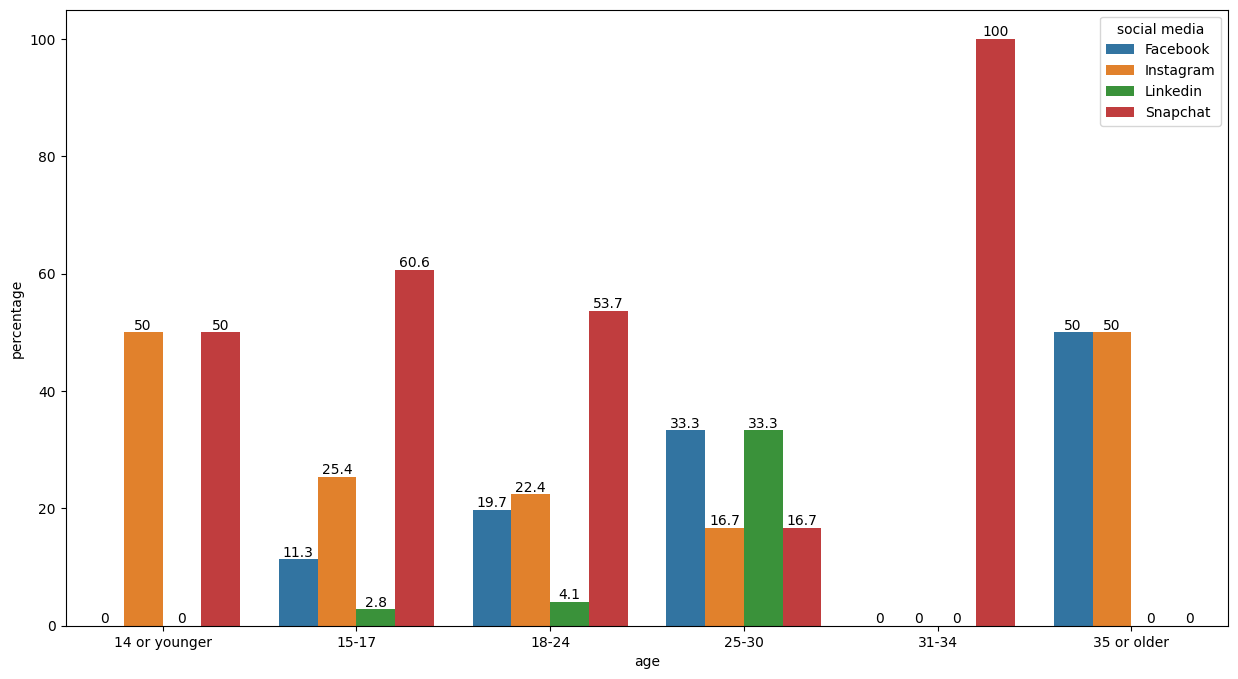

In [29]:
df_chart = df_final.groupby(['age','answer'])[['percentage']].sum().reset_index()
df_chart['percentage'] = df_chart['percentage'].apply(lambda x: x*100)

plt.figure(figsize = (15,8))
ax = sns.barplot(data = df_chart, x = 'age', y = 'percentage', hue = 'answer')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
plt.legend(title = 'social media')
plt.show()

Younger people do not use facebook anymore and 25 to 30 people tends to use linkedin as much as facebook

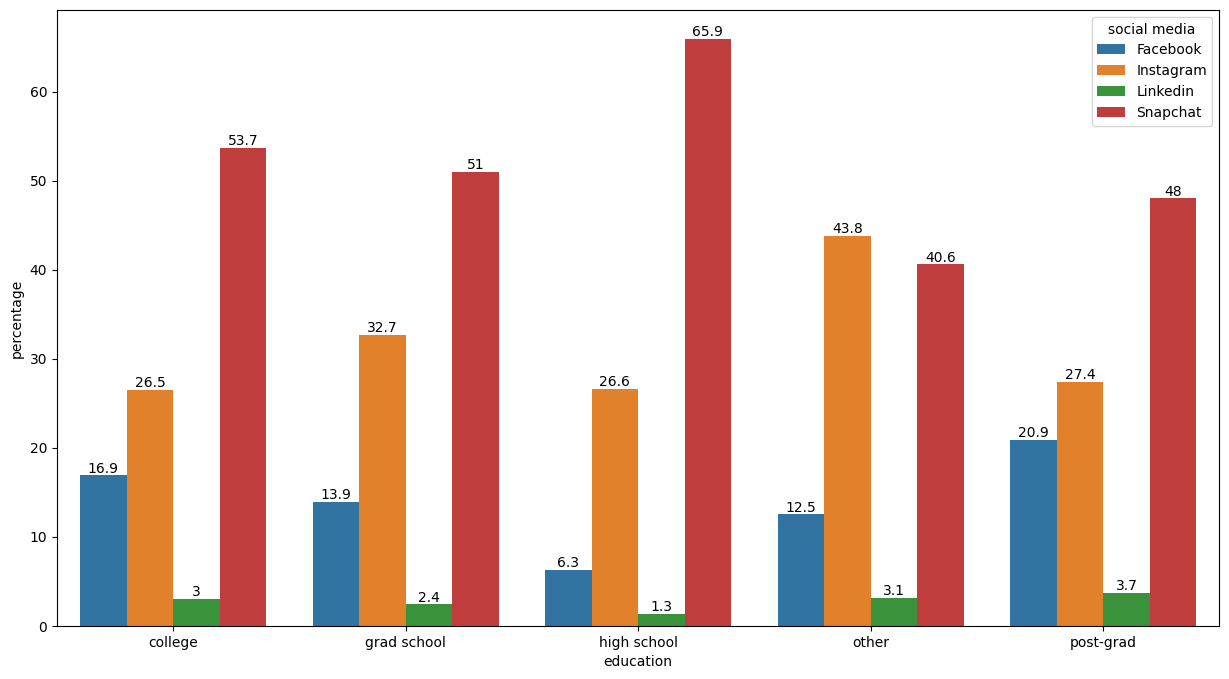

In [30]:
df_chart = df_final.groupby(['studying','answer'])[['percentage']].sum().reset_index()
df_chart['percentage'] = df_chart['percentage'].apply(lambda x: x*100)

plt.figure(figsize = (15,8))
ax = sns.barplot(data = df_chart, x = 'studying', y = 'percentage', hue = 'answer')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
plt.legend(title = 'social media')
plt.xlabel('education')
plt.show()

People in high school prefer snapchat, besides that, post graduated people are still enjoying facebook

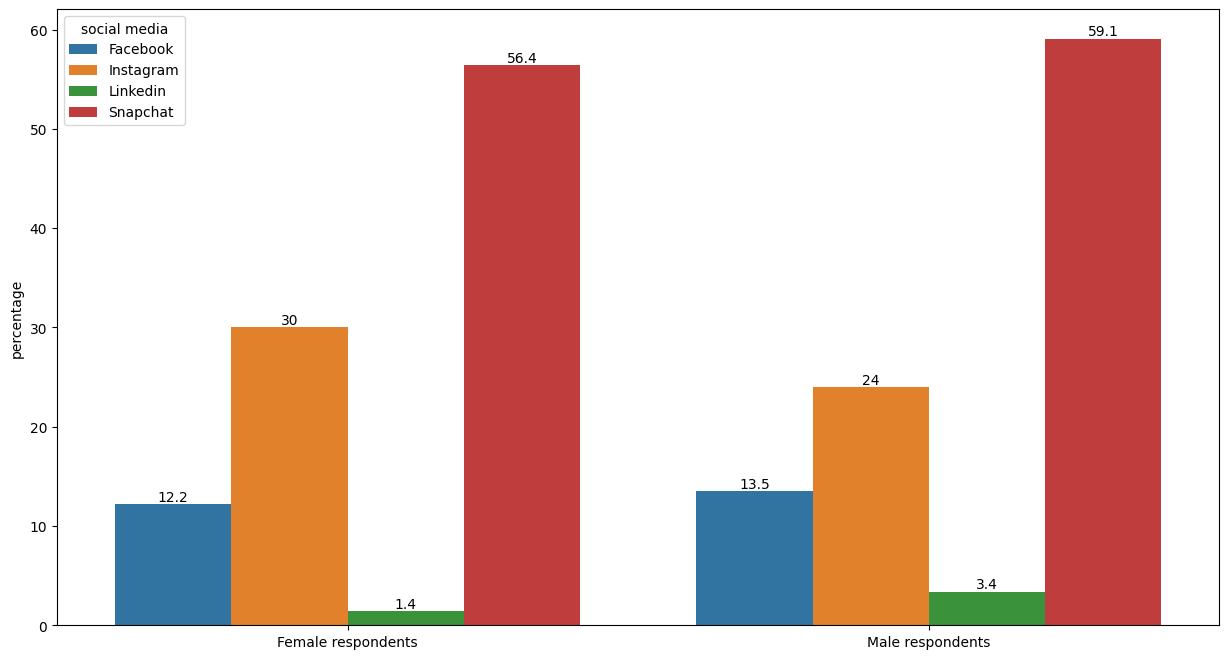

In [31]:
df_chart = df_final[df_final.question_segment == 'Gender'].groupby(['segment_description','answer'])[['percentage']].sum().reset_index()
df_chart['percentage'] = df_chart['percentage'].apply(lambda x: x*100)

plt.figure(figsize = (15,8))
ax = sns.barplot(data = df_chart, x = 'segment_description', y = 'percentage', hue = 'answer')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
plt.xlabel('')
plt.legend(title = 'social media')
plt.show()

Female gender is enjoying instagram more tham Male. 

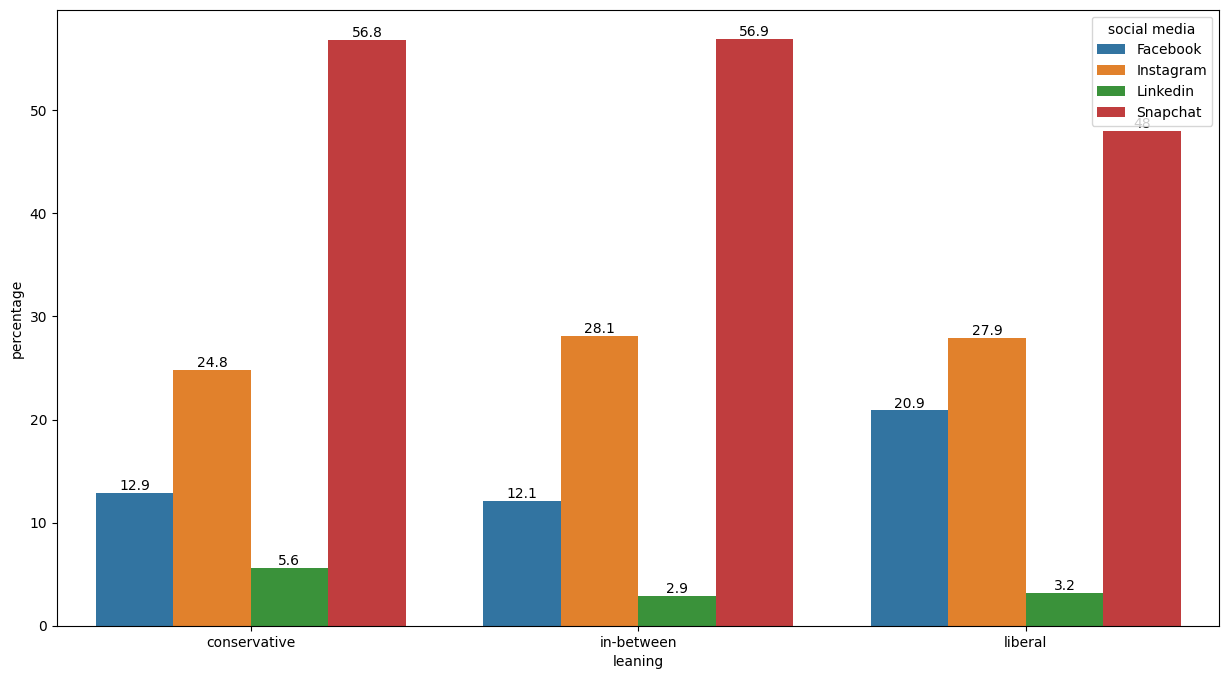

In [32]:
df_chart = df_final.groupby(['leaning','answer'])[['percentage']].sum().reset_index()
df_chart['percentage'] = df_chart['percentage'].apply(lambda x: x*100)

plt.figure(figsize = (15,8))
ax = sns.barplot(data = df_chart, x = 'leaning', y = 'percentage', hue = 'answer')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
plt.legend(title = 'social media')
plt.show()

Liberals prefer facebook more than conservatives and in-between's

# Conclusion

Generally, we can conclude that, for this dataset, Snapchat is preferred. However, for other social media platforms, factors such as religion, politics, age, education, etc., can influence these preferences.

Upvote if you like this analysis